In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed


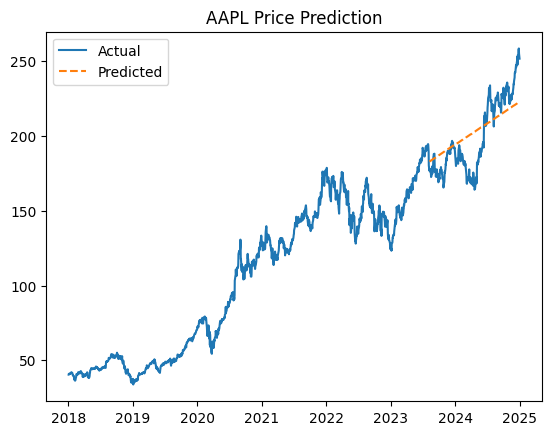

In [10]:

# Load data
ticker = "AAPL"
data = yf.download(ticker, start="2018-01-01", end="2024-12-31")[["Close"]]
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data["Day"] = np.arange(len(data))

# Prepare features
X = data[["Day"]]
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Save the model if needed
import joblib
joblib.dump(model, "linear_model.pkl")

# Plot
plt.plot(data["Date"], y, label="Actual")
plt.plot(data["Date"].iloc[-len(y_test):], y_pred, label="Predicted", linestyle="--")
plt.legend()
plt.title("AAPL Price Prediction")
plt.show()